<a href="https://colab.research.google.com/github/AmanuelKBr/PROJECTS_1/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,122881.000000,122881.000000,122881.000000,122881.000000,122881.000000,122881.000000,122881.000000,122881.000000,122881.000000,122881.000000,...,122880.000000,122880.000000,122880.000000,122880.000000,122880.000000,122880.000000,122880.000000,122880.000000,122880.000000,122880.000000
mean,47960.696788,-0.253250,-0.005554,0.677405,0.152665,-0.282974,0.087168,-0.114256,0.061358,-0.082085,...,-0.035798,-0.114510,-0.034994,0.011765,0.130405,0.027722,0.000683,0.001862,93.959043,0.002035
std,19271.900236,1.834020,1.633205,1.288146,1.334018,1.327517,1.291374,1.186551,1.218203,1.094722,...,0.727846,0.636947,0.612574,0.594813,0.439128,0.491219,0.393659,0.316475,255.084703,0.045060
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36052.000000,-1.021720,-0.581971,0.173661,-0.706443,-0.903002,-0.655439,-0.601388,-0.133808,-0.710413,...,-0.225735,-0.542633,-0.173788,-0.324193,-0.135449,-0.323343,-0.060889,-0.004492,6.790000,0.000000
50%,49837.000000,-0.264411,0.091708,0.752260,0.181079,-0.315399,-0.166068,-0.065620,0.077815,-0.143429,...,-0.059072,-0.092418,-0.047193,0.068303,0.167028,-0.063527,0.010946,0.023472,24.990000,0.000000
75%,63807.000000,1.155820,0.758901,1.372370,1.010846,0.241297,0.476502,0.412303,0.371037,0.500983,...,0.116776,0.305230,0.082634,0.408798,0.418853,0.293750,0.084951,0.077447,84.450000,0.000000
max,76723.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.dropna(inplace=True)

(0.0, 500.0)

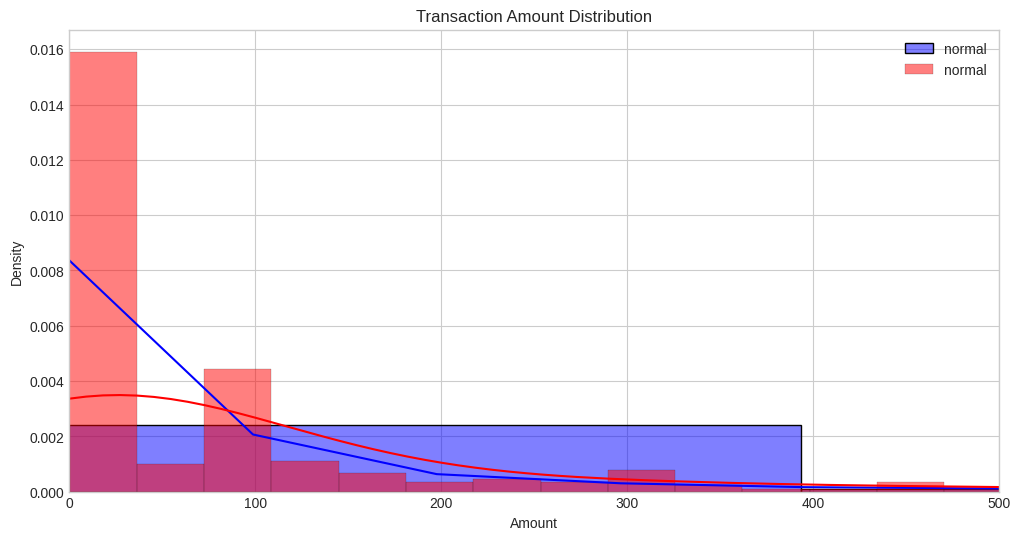

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

plt.figure(figsize=(12,6))
sns.histplot(normal['Amount'], bins=50, color='blue', stat='density',label='normal', kde=True)
sns.histplot(fraud['Amount'], bins=50, color='red', stat='density',label='normal', kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.xlim(0,500)

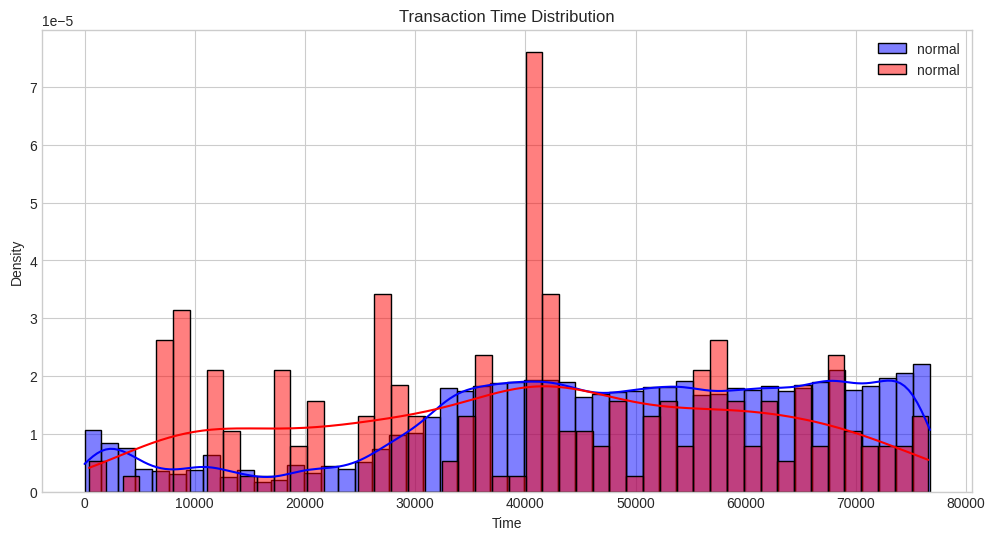

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(normal['Time'], bins=50, color='blue', stat='density',label='normal', kde=True)
sns.histplot(fraud['Time'], bins=50, color='red', stat='density',label='normal', kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

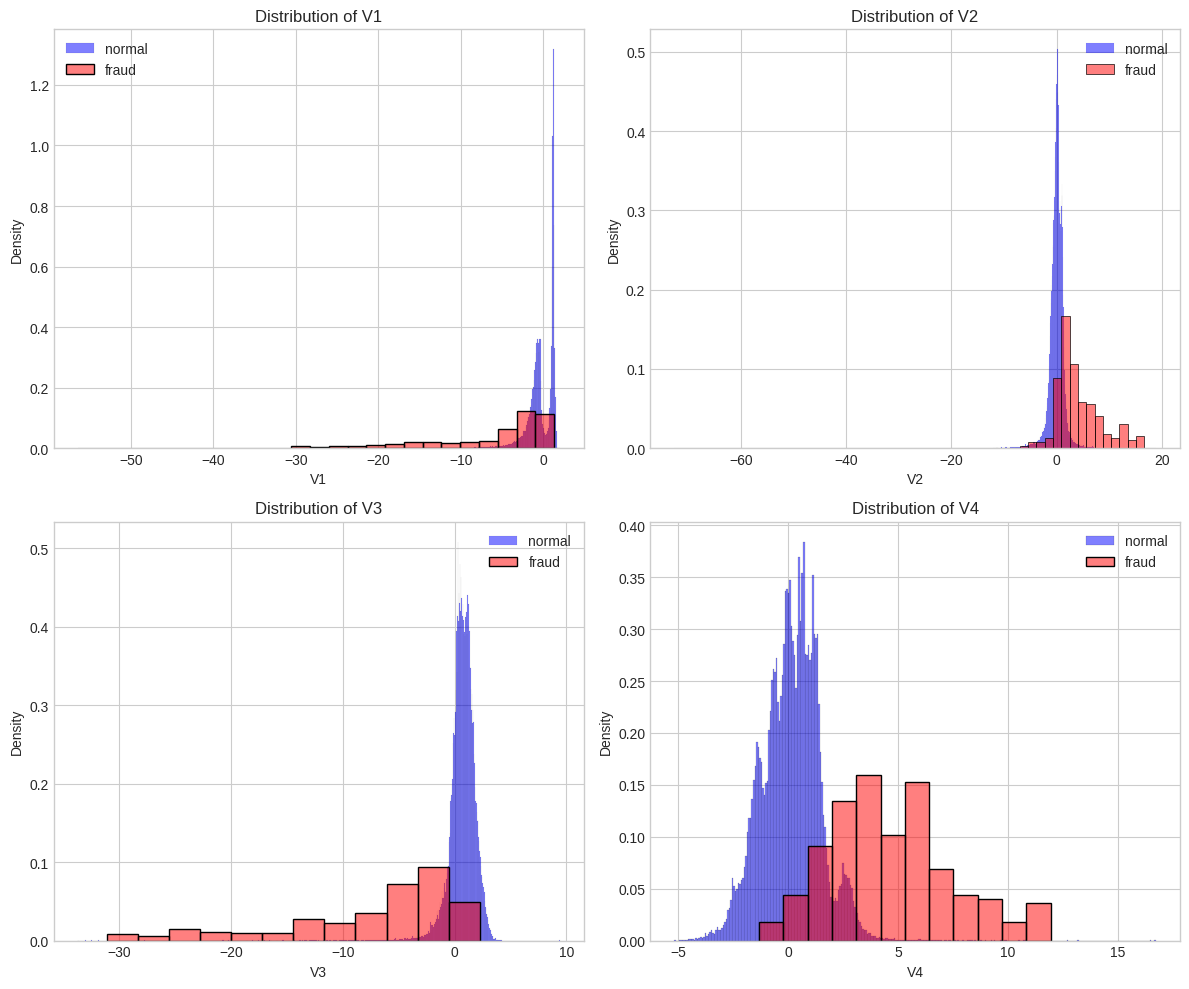

In [ ]:
#PCA Feature Exploration
plt.figure(figsize=(12,10))

for i in range(1,5):
  plt.subplot(2,2,i)
  feature = f'V{i}'
  sns.histplot(normal[feature], color='blue', stat='density',label='normal', alpha=0.5)
  sns.histplot(fraud[feature], color='red', stat='density',label='fraud', alpha=0.5)
  plt.title(f'Distribution of {feature}')
  plt.legend()
plt.tight_layout()

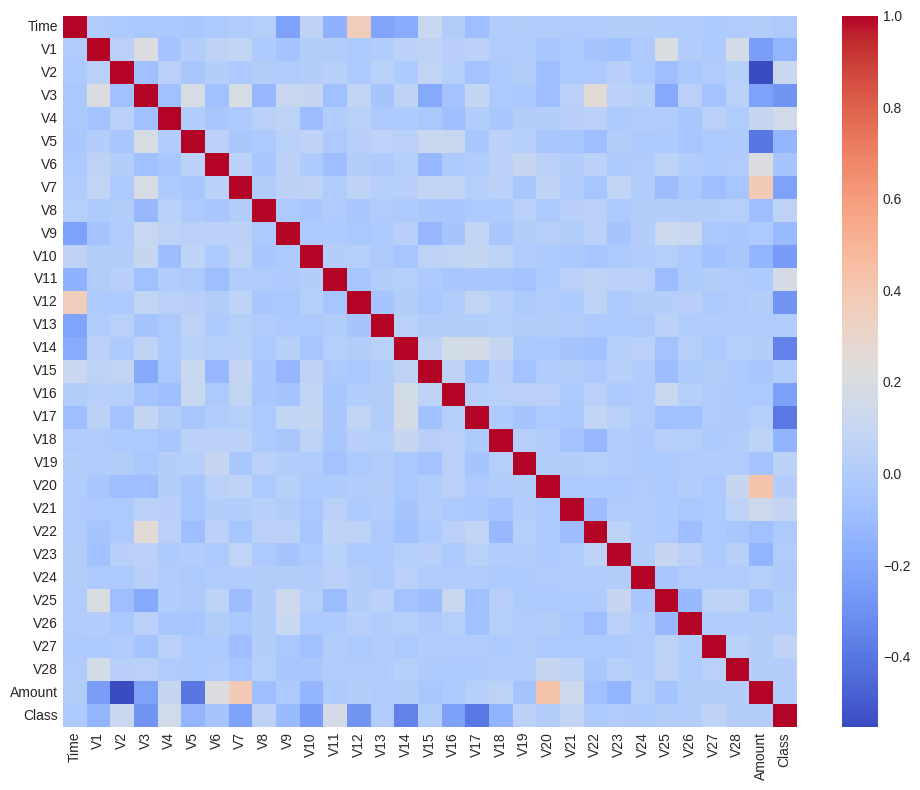

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.tight_layout()

In [ ]:
# ----Data Preprocessing -----
# Scale amount and time
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.218207,-2.488644
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.357800,-2.488644
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.116108,-2.488592
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.115809,-2.488592
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.093965,-2.488540


In [ ]:
# Drop unecessary columns
df = df.drop(['Time', 'Amount'], axis=1)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.218207,-2.488644
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.357800,-2.488644
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.116108,-2.488592
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.115809,-2.488592
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.093965,-2.488540


In [ ]:
# Begin training
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Frauds in training set:", y_train.sum())
print("Frauds in testing set:", y_test.sum())

Training set shape: (98304, 30)
Testing set shape: (24576, 30)
Frauds in training set: 200.0
Frauds in testing set: 50.0


In [ ]:
# Handling Class Imbalance
# Method 1: Using Class Weights (will be applied to model directly)
print ("Original Class Distribution ", Counter(y_train))

Original Class Distribution  Counter({0.0: 98104, 1.0: 200})


In [ ]:
# Method 2: Random Undersampling
# Set fraud to normal ration 1:3
undersampler = RandomUnderSampler(sampling_strategy=0.33, random_state=42)
x_under, y_under = undersampler.fit_resample(x_train, y_train)
print ("Class Distribution after undersampling:", Counter(y_under))

Class Distribution after undersampling: Counter({0.0: 606, 1.0: 200})


In [ ]:
# Methiod 3: SMOTE (Synthetic Minority Oversampling Technique) - data augmentation
smote = SMOTE(sampling_strategy=0.33, random_state=42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)
print ("Class Distribution after SMOTE Oversampling:", Counter(y_smote))

Class Distribution after SMOTE Oversampling: Counter({0.0: 98104, 1.0: 32374})


Text(0.5, 1.0, 'Original  Distribution')

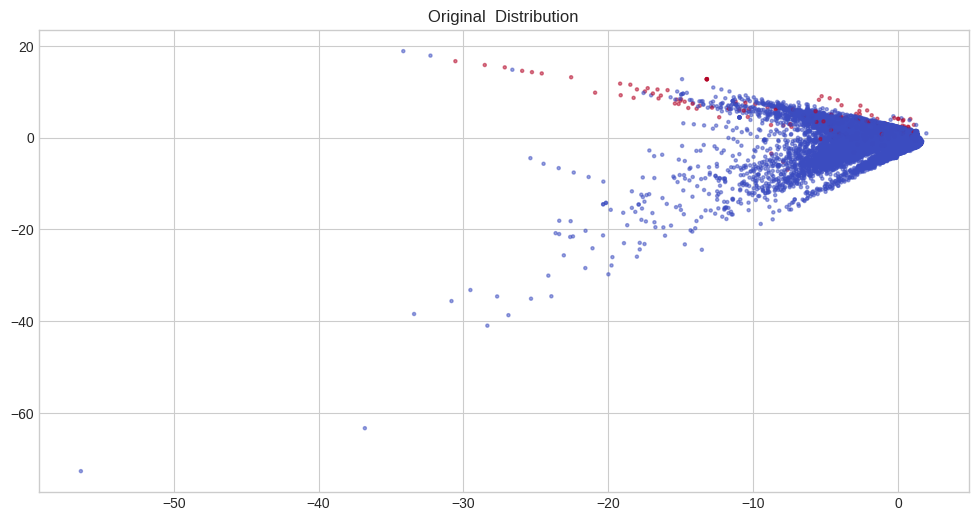

In [39]:
# Visualize the effect of the methods
plt.figure(figsize=(12,6))
plt.scatter(x_train['V1'], x_train['V2'], c=y_train, cmap='coolwarm', alpha=0.5, s=5)
plt.title('Original  Distribution')

Text(0.5, 1.0, 'Undersampled Distribution')

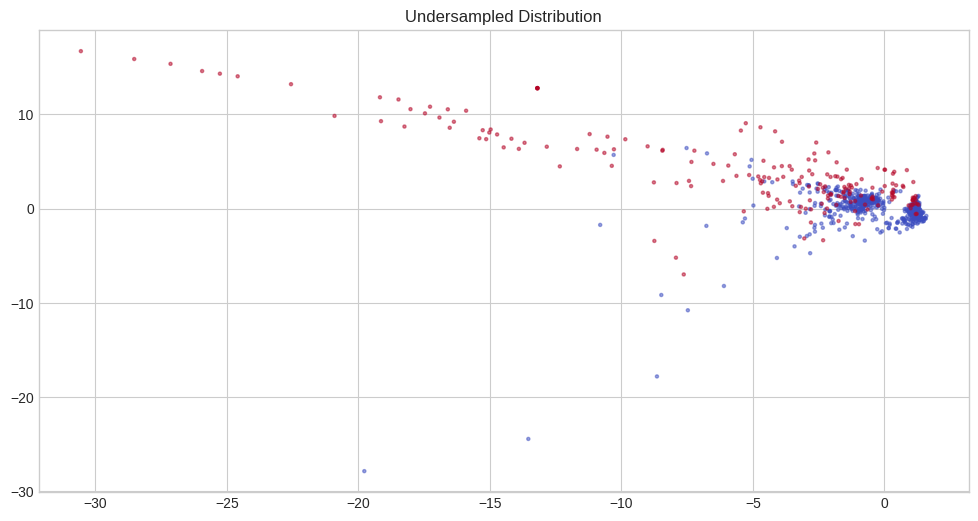

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(x_under['V1'], x_under['V2'], c=y_under, cmap='coolwarm', alpha=0.5, s=5)
plt.title('Undersampled Distribution')

Text(0.5, 1.0, 'SMOTE Oversampled Distribution')

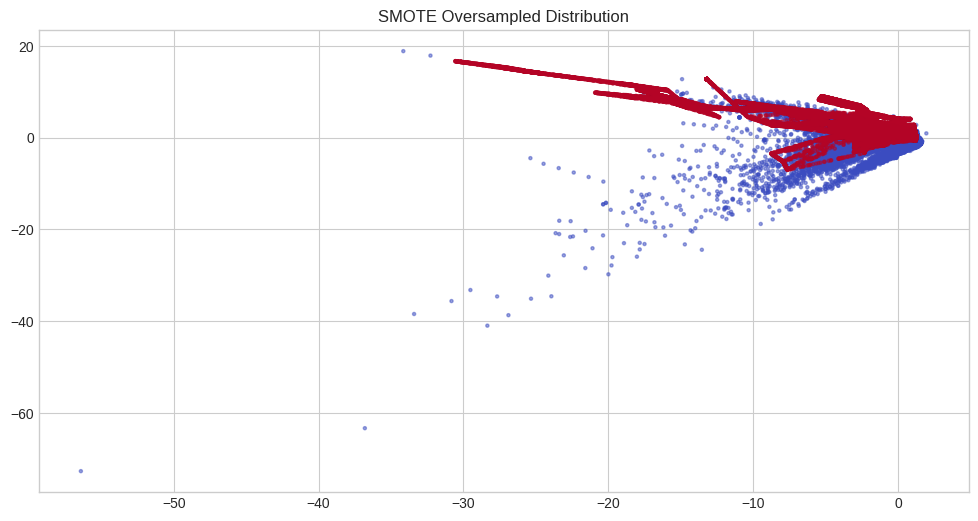

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(x_smote['V1'], x_smote['V2'], c=y_smote, cmap='coolwarm', alpha=0.5, s=5)
plt.title('SMOTE Oversampled Distribution')

In [43]:
# Train the model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(x_smote, y_smote)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [44]:
y_pred_lr = log_reg.predict(x_test)
y_prob_lr = log_reg.predict_proba(x_test)[:,1]

In [45]:
# Evaluate performance
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[23926   600]
 [    4    46]]


In [47]:
x_smote.shape

(130478, 30)

Text(55.58333333333333, 0.5, 'Actual ')

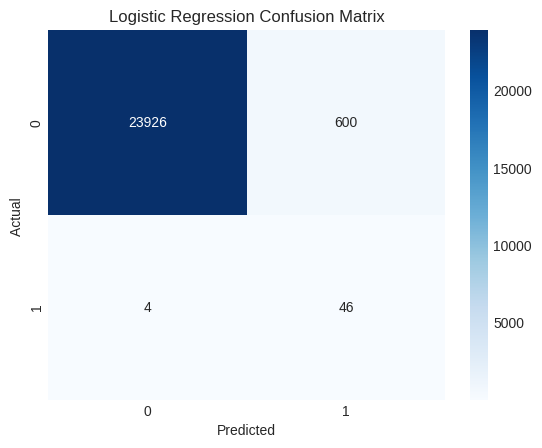

In [46]:
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual ')

In [48]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_smote, y_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:,1]

In [50]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[24523     3]
 [   10    40]]


Text(55.58333333333333, 0.5, 'Actual')

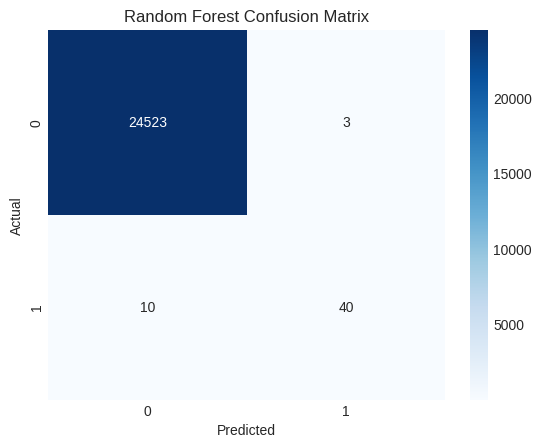

In [51]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')